# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urangan
Processing Record 2 of Set 1 | kisangani
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | motygino
Processing Record 10 of Set 1 | paoua
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kievka
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | castillos
Processing Record 16 of Set 1 | joal-fadiout
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | kapa'a
Processing Record 19 of Set 1 | hammerfest
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | grytviken
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urangan,-25.3000,152.9000,294.48,70,100,7.34,AU,1728856253
1,kisangani,0.5167,25.2000,294.63,94,31,0.54,CD,1728856254
2,vorgashor,67.5833,63.9500,271.69,95,55,6.27,RU,1728856255
3,ushuaia,-54.8000,-68.3000,281.96,71,40,7.72,AR,1728856257
4,port-aux-francais,-49.3500,70.2167,277.08,90,93,10.38,TF,1728856258


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,294.48,70,100,7.34,AU,1728856253
1,kisangani,0.5167,25.2000,294.63,94,31,0.54,CD,1728856254
2,vorgashor,67.5833,63.9500,271.69,95,55,6.27,RU,1728856255
3,ushuaia,-54.8000,-68.3000,281.96,71,40,7.72,AR,1728856257
4,port-aux-francais,-49.3500,70.2167,277.08,90,93,10.38,TF,1728856258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

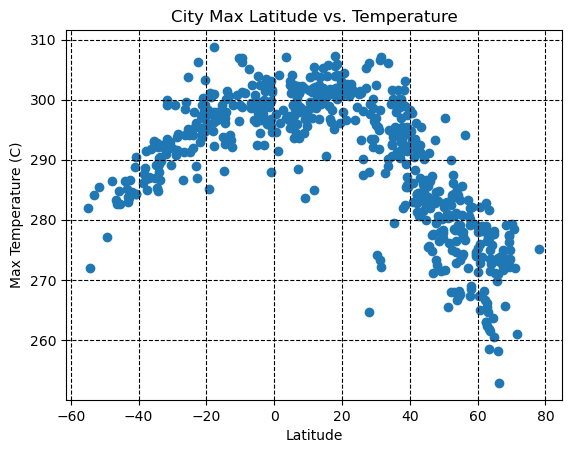

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"] , city_data_df["Max Temp"] , marker= "o")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(color = "black" , linestyle = "--")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

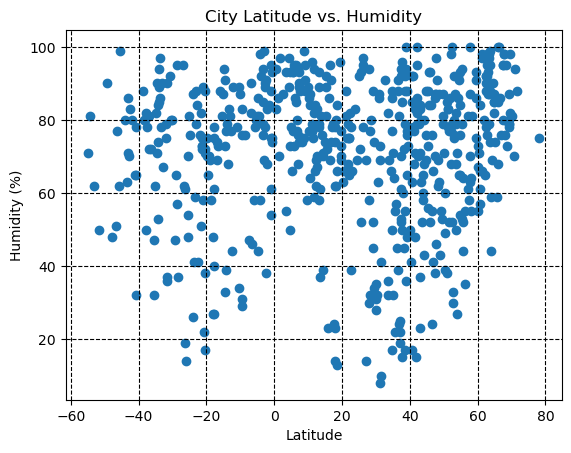

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"] , city_data_df["Humidity"] , marker= "o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color = "black" , linestyle = "--")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

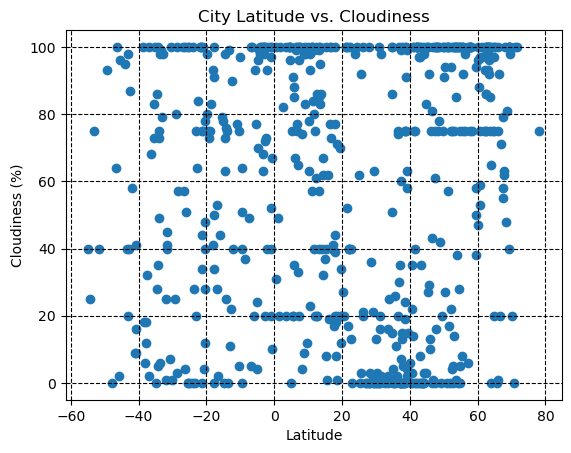

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"] , city_data_df["Cloudiness"] , marker= "o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color = "black" , linestyle = "--")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

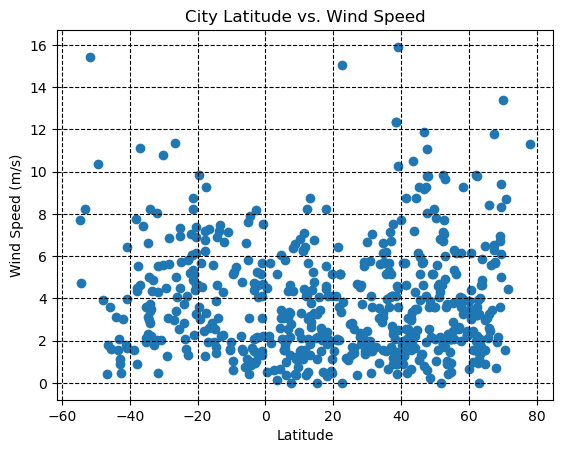

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"] , city_data_df["Wind Speed"] , marker= "o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(color = "black" , linestyle = "--")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def regression_function(df, x_col , y_col , title , x_label , y_label):
    plt.scatter(df[x_col], df[y_col] , marker= "o")
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    x_values = df[x_col]
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='red', linestyle='--', label='Fit Line')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction',)
    
    plt.show()

    return r_value**2

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kisangani,0.5167,25.2000,294.63,94,31,0.54,CD,1728856254
2,vorgashor,67.5833,63.9500,271.69,95,55,6.27,RU,1728856255
6,dudinka,69.4058,86.1778,273.19,87,100,9.41,RU,1728856261
8,motygino,58.1831,94.7592,268.99,64,100,3.28,RU,1728856263
9,paoua,7.2427,16.4406,293.64,93,96,1.32,CF,1728856265


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,294.48,70,100,7.34,AU,1728856253
3,ushuaia,-54.8000,-68.3000,281.96,71,40,7.72,AR,1728856257
4,port-aux-francais,-49.3500,70.2167,277.08,90,93,10.38,TF,1728856258
5,edinburgh of the seven seas,-37.0676,-12.3116,286.89,81,100,11.12,SH,1728856260
7,papatowai,-46.5619,169.4708,283.33,51,64,0.40,NZ,1728856262


###  Temperature vs. Latitude Linear Regression Plot

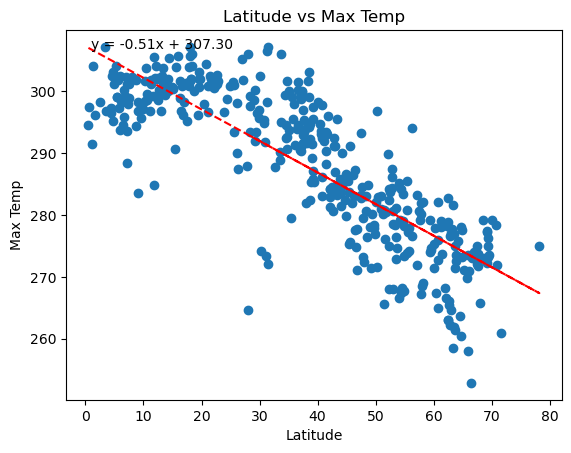

The r^2-value is: 0.6883458681803455


In [30]:
# Linear regression on Northern Hemisphere
North_temp_vs_lat = regression_function(northern_hemi_df , "Lat" , "Max Temp" , "Latitude vs Max Temp" , "Latitude" , "Max Temp")
print(f"The r^2-value is: {North_temp_vs_lat:.16f}")

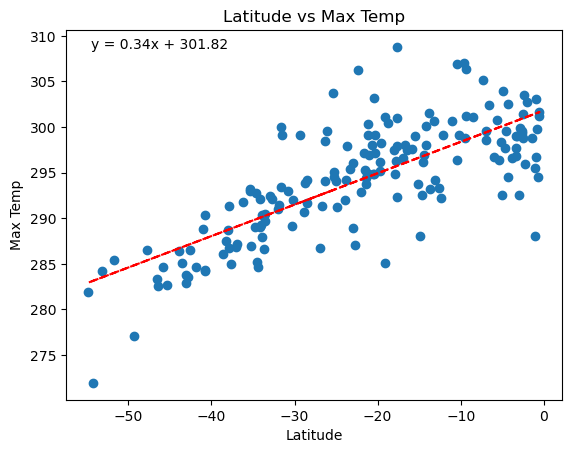

The r^2-value is: 0.5817690055296459


In [33]:
# Linear regression on Southern Hemisphere
south_temp_vs_lat = regression_function(southern_hemi_df , "Lat" , "Max Temp" , "Latitude vs Max Temp" , "Latitude" , "Max Temp")
print(f"The r^2-value is: {south_temp_vs_lat:.16f}")

**Discussion about the linear relationship: Based on the r2 values , There is a stronger correlation between latitude and max temps in the north hemisphere then the south hemispere. Both show are strong correlation between temps and latitude

### Humidity vs. Latitude Linear Regression Plot

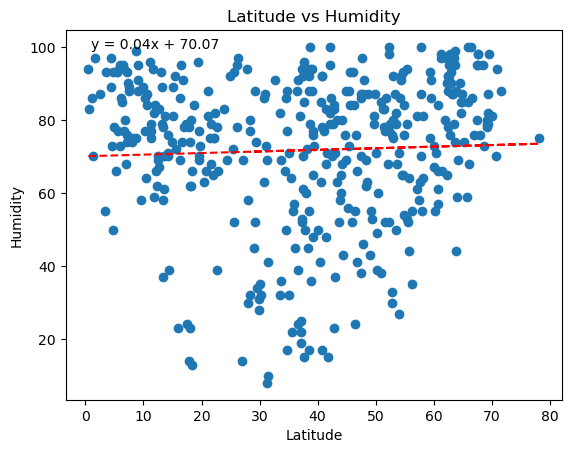

The r^2-value is: 0.0017410506235880


In [34]:
# Northern Hemisphere
north_hum_vs_lat = regression_function(northern_hemi_df , "Lat" , "Humidity" , "Latitude vs Humidity" , "Latitude" , "Humidity")
print(f"The r^2-value is: {north_hum_vs_lat:.16f}")

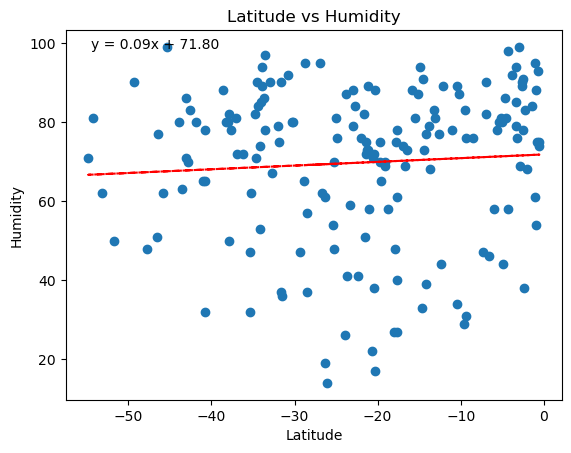

The r^2-value is: 0.0045687782204929


In [35]:
# Southern Hemisphere
south_hum_vs_lat = regression_function(southern_hemi_df , "Lat" , "Humidity" , "Latitude vs Humidity" , "Latitude" , "Humidity")
print(f"The r^2-value is: {south_hum_vs_lat:.16f}")

**Discussion about the linear relationship: Based on the R^2 values for the north and south hemispheres , There is a very weak correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

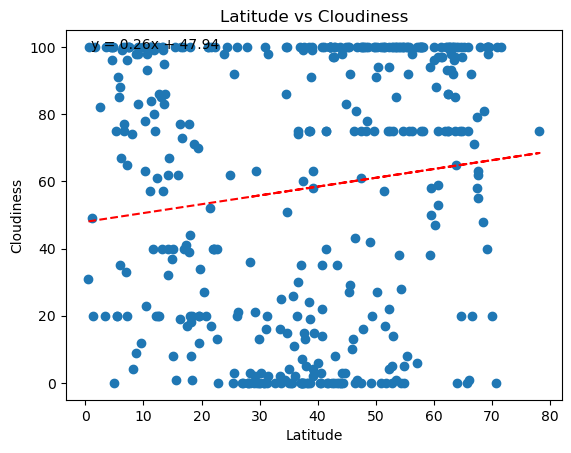

The r^2-value is: 0.0170054452746363


In [37]:
# Northern Hemisphere
north_cloud_vs_lat = regression_function(northern_hemi_df , "Lat" , "Cloudiness" , "Latitude vs Cloudiness" , "Latitude" , "Cloudiness")
print(f"The r^2-value is: {north_cloud_vs_lat:.16f}")

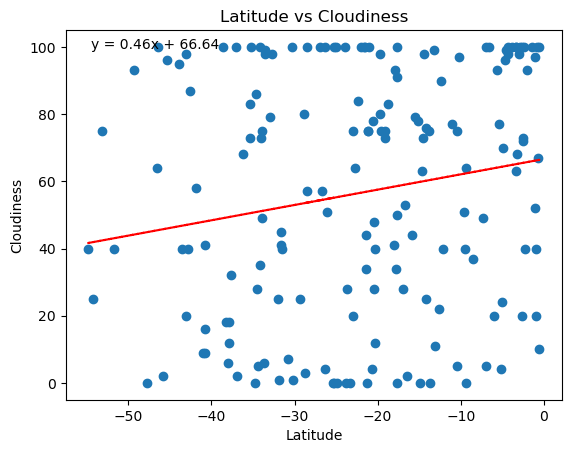

The r^2-value is: 0.0314914219287848


In [38]:
# Southern Hemisphere
south_cloud_vs_lat = regression_function(southern_hemi_df , "Lat" , "Cloudiness" , "Latitude vs Cloudiness" , "Latitude" , "Cloudiness")
print(f"The r^2-value is: {south_cloud_vs_lat:.16f}")

**Discussion about the linear relationship: In both hemispheres the r2 values are low indicating a very weak correation between latitude and couldness 

### Wind Speed vs. Latitude Linear Regression Plot

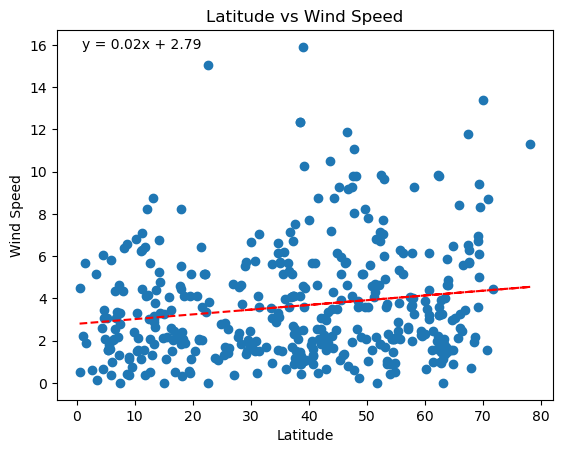

The r^2-value is: 0.0271527780788123


In [39]:
# Northern Hemisphere
north_wind_vs_lat = regression_function(northern_hemi_df , "Lat" , "Wind Speed" , "Latitude vs Wind Speed" , "Latitude" , "Wind Speed")
print(f"The r^2-value is: {north_wind_vs_lat:.16f}")

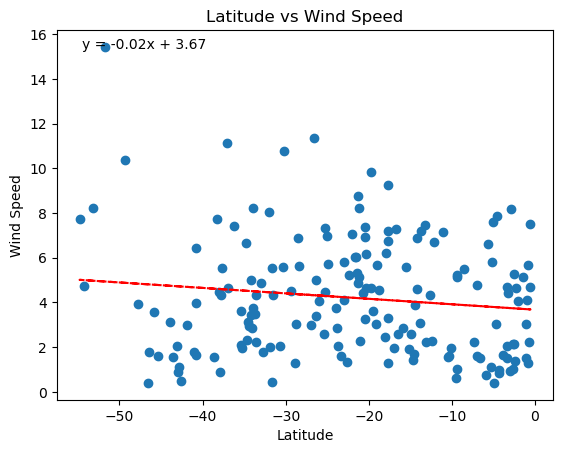

The r^2-value is: 0.0171220831722144


In [40]:
# Southern Hemisphere
south_wind_vs_lat = regression_function(southern_hemi_df , "Lat" , "Wind Speed" , "Latitude vs Wind Speed" , "Latitude" , "Wind Speed")
print(f"The r^2-value is: {south_wind_vs_lat:.16f}")

**Discussion about the linear relationship: In both hemispheres the r2 values are low indicating a very weak correation between latitude and Wind speed 